In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import albumentations as A
import vidaug.augmentors as va
from tqdm.notebook import tqdm

sys.path.append('../src/')
from utils import apply_video_augmentations

In [3]:
DATA_DIR = Path('../data/')
CLASSES = ["bridge_down", "bridge_up", "no_action", "train_in_out"]
SEED = 42
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
train_clips = sum([list(DATA_DIR.joinpath("train_np", c).glob("*.npy")) for c in CLASSES], [])
train_clips = pd.DataFrame([clip.parts[-2:] for clip in train_clips], columns=["label", "fname"])

train_clips

,label,fname
0,bridge_down,b0b2e92153ee21f3.npy
1,bridge_down,f483e6a3df76dac7.npy
2,bridge_down,39e219921d3535e4.npy
3,bridge_down,7ae945d231190aad.npy
4,bridge_down,09d889aa5ce5b662.npy
...,...,...
491,train_in_out,052b084edf435fd0.npy
492,train_in_out,621b1a0f13b27229.npy
493,train_in_out,3fa81e76b90b7efd.npy
494,train_in_out,9f3ba81c4c6ffbd2.npy


In [5]:
sample_clip = train_clips.sample(100, random_state=SEED).iloc[50]
sample_clip_path = DATA_DIR.joinpath("train_np", sample_clip.label, sample_clip.fname)
clip = np.load(sample_clip_path)

In [6]:
sample_clip_path

PosixPath('../data/train_np/train_in_out/bb3f80126973704d.npy')

In [7]:
clip.shape

(250, 240, 320, 3)

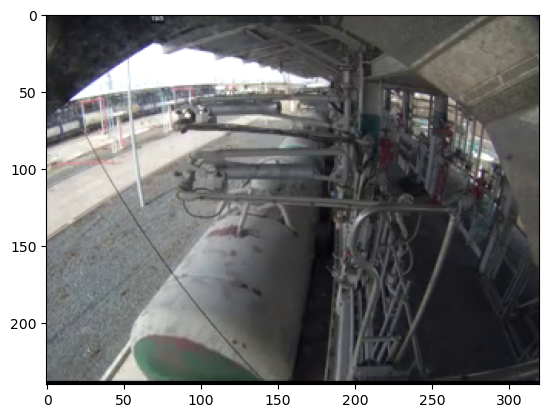

In [8]:
plt.imshow(clip[15])

In [9]:
clip.shape

(250, 240, 320, 3)

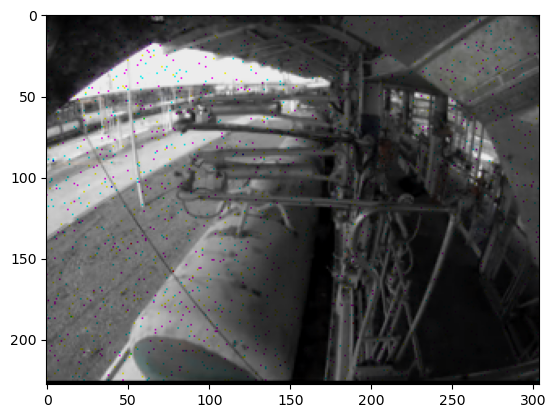

In [35]:
clip_aug = apply_video_augmentations(clip, p_orig=0.1, p_aug=0.3)
plt.imshow(clip_aug[15])